# Lab 2


***

## Part a: Ultrasound Imaging Noise and Enhancement

### Introduction: Understanding Noise in Medical Imaging
Ultrasound imaging is widely used in clinical settings due to its non-invasive nature and real-time visualization. However, ultrasound scans are often degraded by **various noise types** that obscure important clinical details. In this part of the assignment, you will explore different types of noise and learn how to apply **filters** to enhance the quality of the ultrasound images.

Improving the **Signal-to-Noise Ratio (SNR)** is crucial for accurate diagnosis, as a clearer image helps clinicians detect subtle abnormalities. Your task will be to experiment with different types of noise, apply enhancement filters, and compare the results based on the calculated **SNR** and **noise power** metrics.



---


### Exploring the Playground

Below is a sample output you should aim to achieve using the playground:

- **Image 1:** Noisy Image with Gaussian and Speckle Noise applied.
- **Image 2:** Noise Map visualizing noise distribution.
- **Image 3:** Image with no filter applied (for comparison).
- **Image 4:** Image enhanced using Histogram Equalization.





Installing Libraries

Importing Libraries

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import exposure
import ipywidgets as widgets
from ipywidgets import interact
from skimage import exposure



Read  NFTI file Function <br>

Using __[Nibabel](https://nipy.org/nibabel/index.html)__ Library




In [ ]:
def read_nfti(file_path):

    # Load the NIFTI file
    nifti_image = nib.load(file_path)

    # Get the data from the NIFTI file
    nifti_data = nifti_image.get_fdata()

    return nifti_image,nifti_data

Load Image

In [ ]:
nifti_image,nifti_data=read_nfti('Data/Ultrasound/patient0005_4CH_ES.nii.gz')
nifti_data=nifti_data.T

# Ensure the data is in the 0-255 range (if not already)
nifti_data = np.clip(nifti_data, 0, 255).astype(np.uint8)

plt.imshow(nifti_data,cmap='gray')

### Noise Simulation 
Add Gaussian and Speckle noise to an image

In [ ]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=15):
    noisy_image = image + np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Function to add Speckle noise
def add_speckle_noise(image, std=0.05):
    noise = np.random.normal(0, std, image.shape)
    noisy_image = image + image * noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

### Metrics

#### SNR (Signal-to-Noise Ratio)
Measures signal clarity compared to noise. Higher SNR indicates stronger signal.

$$
SNR = 10 \cdot \log_{10} \left( \frac{P_{\text{signal}}}{P_{\text{noise}}} \right) \, \text{dB}
$$

*   $P_{\text{signal}}$ is signal power, estimated as mean squared value of original image.
*   $P_{\text{noise}}$ is noise power, estimated as mean squared difference between original and noisy image.

#### Noise Power
Represents noise strength or variance in image. Higher noise power indicates more noise, degrading image quality.

$$
P_{\text{noise}} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$


In [ ]:
# Function to calculate SNR
def calculate_snr(original_image, noisy_image):
    original_image = original_image.astype(np.float32)
    noisy_image = noisy_image.astype(np.float32)
    
    signal_power = np.mean(original_image ** 2)
    noise = original_image - noisy_image
    noise_power = np.mean(noise ** 2)
    
    if noise_power == 0:
        return np.inf, noise_power  # Perfect image with no noise
    snr = 10 * np.log10(signal_power / noise_power)
    return snr, noise_power


### Image Filtering and Enhancement


Apply filters to denoise images.


##### Filter Types

1.  Median Blur
2.  Gaussian Blur
3.  Bilateral Filter
4.  Non-Local Means Denoising


##### Implementation

Implement `apply_filters` function with specified filter types.

### Histogram Equalization

Enhance image contrast.


##### Methods

1.  Normal Histogram Equalization
2.  Adaptive Histogram Equalization (CLAHE)




In [ ]:
# Function to apply various filters
def apply_filters(noisy_image, filter_type,**kwargs):
    if filter_type == 'Median':
        return cv2.medianBlur(noisy_image, kwargs.get('kernel_size'))  # 5x5 kernel
    elif filter_type == 'Gaussian':
        return cv2.GaussianBlur(noisy_image, (5, 5), 0)  # Gaussian filter
    elif filter_type == 'Bilateral':
        return cv2.bilateralFilter(noisy_image, kwargs.get('diameter'), kwargs.get('sigma_color'), kwargs.get('sigma_space'))  # Bilateral filter
    elif filter_type == 'Non-Local Means':
        return cv2.fastNlMeansDenoising(noisy_image, h=kwargs.get('h'),
                                         templateWindowSize=kwargs.get('template_window'),
                                         searchWindowSize=kwargs.get('search_window'))
    else:
        return noisy_image  # No filtering applied

# Function to apply normal histogram equalization
def apply_histogram_equalization(image):
    return exposure.equalize_hist(image) * 255  # Scale it back to 0-255

# Function to apply adaptive histogram equalization (CLAHE)
def apply_clahe(image, clip_limit=2.0, tile_grid_size=8):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_grid_size, tile_grid_size))
    return clahe.apply(image)



### Image Denoising and Enhancement Toolbox


#### Interactive Image Processing

Explore image denoising and enhancement techniques.


### Noise Addition

1.  Apply Gaussian noise
2.  Apply Speckle noise


### Filtering

1.  Median Blur
2.  Gaussian Blur
3.  Bilateral Filter
4.  Non-Local Means Denoising


### Histogram Equalization

1.  Normal Histogram Equalization
2.  Adaptive Histogram Equalization (CLAHE)


### Interactive Parameters

1.  Noise standard deviation (Gaussian and Speckle)
2.  Filter type and kernel size
3.  Histogram equalization type
4.  CLAHE clip limit and tile grid size




In [ ]:






# Function to visualize noise map
def plot_noise_map(original_image, noisy_image):
    noise_map = np.abs(original_image.astype(np.float32) - noisy_image.astype(np.float32))
    plt.imshow(noise_map, cmap='gray')
    plt.title('Noise Map')
    plt.axis('off')
    plt.show()




# Plotting function to show images side by side
def plot(original_image, filtered_image, hist_eq_image, noisy_snr, filtered_snr, noisy_power, title, hist_type,noisy_image):
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    # Noisy Image
    ax[0].imshow(noisy_image, cmap='gray')
    ax[0].set_title(f'Noisy Image | SNR: {noisy_snr:.2f} dB/nNoise Power: {noisy_power:.2f}')
    ax[0].axis('off')
    # Noise Map Visualization
    noise_map = np.abs(original_image.astype(np.float32) - noisy_image.astype(np.float32))
    ax[1].imshow(noise_map, cmap='gray')
    ax[1].set_title('Noise Map')
    ax[1].axis('off')

    # Filtered Image
    ax[2].imshow(filtered_image, cmap='gray')
    ax[2].set_title(f'{title} | SNR: {filtered_snr:.2f} dB')
    ax[2].axis('off')
    
    # Histogram Equalized Image
    ax[3].imshow(hist_eq_image, cmap='gray')
    ax[3].set_title(f'{hist_type} Equalization')
    ax[3].axis('off')


    plt.show()


# Interactive filtering, noise removal, and histogram equalization
def interactive_plot(apply_gaussian, gaussian_std, apply_speckle, speckle_std, filter_type, hist_type, clahe_clip_limit,
                      clahe_tile_grid_size,kernel_size,h,template_window,search_window
                      ,diameter,sigma_color,sigma_space):
    noisy_image = nifti_data.copy()
    
    # Apply Gaussian noise if selected
    if apply_gaussian:
        noisy_image = add_gaussian_noise(noisy_image, std=gaussian_std)
    
    # Apply Speckle noise if selected
    if apply_speckle:
        noisy_image = add_speckle_noise(noisy_image, std=speckle_std)
    
    # Calculate SNR and noise power for the noisy image
    noisy_snr, noisy_power = calculate_snr(nifti_data, noisy_image)
    
    # Apply filter to the noisy image
    filtered_image = apply_filters(noisy_image, filter_type,kernel_size=kernel_size,
                                   h=h,template_window=template_window,search_window=search_window,
                                   diameter=diameter,sigma_color=sigma_color,sigma_space=sigma_space
                                   )
    
    # Calculate SNR for the filtered image
    filtered_snr, _ = calculate_snr(nifti_data, filtered_image)
    
    # Apply histogram equalization based on the type chosen by the user
    if hist_type == 'Normal Histogram Equalization':
        hist_eq_image = apply_histogram_equalization(noisy_image).astype(np.uint8)
    elif hist_type == 'Adaptive (CLAHE)':
        hist_eq_image = apply_clahe(noisy_image, clip_limit=clahe_clip_limit, tile_grid_size=clahe_tile_grid_size)
    
    # Calculate SNR for the histogram-equalized image
    
    # Plot the noisy, filtered, and histogram-equalized image side by side
    plt.close('all')  # Close any previous figures before opening a new one to avoid duplication
    plot(nifti_data,filtered_image, hist_eq_image, noisy_snr, filtered_snr, noisy_power, f'{filter_type} Filter Applied', hist_type,noisy_image)

# Create interactive widgets

# Checkboxes for enabling/disabling each noise type
gaussian_checkbox = widgets.Checkbox(value=True, description='Apply Gaussian Noise')
speckle_checkbox = widgets.Checkbox(value=True, description='Apply Speckle Noise')

# Sliders for controlling the std for both noise types
gaussian_std_slider = widgets.FloatSlider(value=15, min=0, max=100, step=1, description='Gaussian Std')
speckle_std_slider = widgets.FloatSlider(value=0.05, min=0, max=5, step=0.01, description='Speckle Std')

# Dropdown for selecting the filter type
filter_type_dropdown = widgets.Dropdown(options=['None', 'Median', 'Gaussian', 'Bilateral', 'Non-Local Means'], 
                                        value='None', description='Filter Type')

# Dropdown for selecting the histogram equalization type
hist_type_dropdown = widgets.Dropdown(options=['Normal Histogram Equalization', 'Adaptive (CLAHE)'], 
                                      value='Normal Histogram Equalization', description='Equalization Type')

# Sliders for controlling CLAHE parameters
clahe_clip_limit_slider = widgets.FloatSlider(value=2.0, min=0.1, max=10.0, step=0.1, description='CLAHE Clip Limit')
clahe_tile_grid_slider = widgets.IntSlider(value=8, min=2, max=16, step=1, description='CLAHE Tile Grid Size')

# Display the interactive widgets
interact(interactive_plot, 
         apply_gaussian=gaussian_checkbox, gaussian_std=gaussian_std_slider,
         apply_speckle=speckle_checkbox, speckle_std=speckle_std_slider,
         filter_type=filter_type_dropdown, hist_type=hist_type_dropdown,
         clahe_clip_limit=clahe_clip_limit_slider, clahe_tile_grid_size=clahe_tile_grid_slider,
        kernel_size=widgets.IntSlider(value=5, min=3, max=15, step=2, description='Kernel Size'),
         h=widgets.FloatSlider(value=10, min=0, max=60, step=1, description='NLM h'),
         template_window=widgets.IntSlider(value=7, min=3, max=15, step=2, description='Template Window'),
         search_window=widgets.IntSlider(value=21, min=7, max=31, step=2, description='Search Window'),
        diameter=widgets.IntSlider(value=9, min=1, max=15, step=1, description='Bilateral Diameter'),
         sigma_color=widgets.FloatSlider(value=75, min=0, max=150, step=5, description='Bilateral Sigma Color'),
         sigma_space=widgets.FloatSlider(value=75, min=0, max=150, step=5, description='Bilateral Sigma Space')


         )



### Assessment Questions
=========================








<br><br> 1.  Explain the concept of Signal-to-Noise Ratio (SNR) and its importance.
<br>
<font color="#008000">Answer :</font>


<br><br>
2.  Compare Median Blur, Gaussian Blur and Bilateral Filter techniques.
<br>
<font color="#008000">Answer :</font>


<br><br>
3.  What is histogram equalization? Explain its purpose.
<br>
<font color="#008000">Answer :</font>











---

## **Part B: Histopathology Analysis: Working with Whole Slide Images (WSI)**
##### Introduction

In this section, students will explore **digital histopathology** by working with **Whole Slide Images (WSI)**. WSI refers to high-resolution scans of tissue sections, often used for diagnostic purposes. These images contain an immense amount of detail, making them essential for **cancer diagnosis**, **disease progression studies**, and **biomarker discovery**. However, WSIs are extremely large and require **specialized pre-processing techniques** to extract meaningful information efficiently.

---


##### Why Pre-process WSIs?

Due to their large size, **WSIs cannot be loaded into memory all at once**, making it necessary to work with smaller **tiles or patches**. These smaller patches represent specific areas of tissue and allow for more manageable analysis. Pre-processing ensures:
- **Efficient handling of large data**.
- **Standardization** of color and appearance across multiple samples, which reduces variability caused by different staining procedures.
- **Faster downstream analysis**, such as training machine learning models for disease classification or segmentation.

---



Libraries Installation

In [ ]:
# The path can also be read from a config file, etc.
OPENSLIDE_PATH = r'C:/TA/Lab 1/openslide-bin-4.0.0.6-windows-x64/bin'
import os
if hasattr(os, 'add_dll_directory'):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

In [ ]:
# !pip install openslide-python


Libraries Importing

In [ ]:
from openslide import OpenSlideError
import math
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import datetime
import skimage.color as sk_color
import skimage.exposure as sk_exposure
import skimage.morphology as sk_morphology
import cv2


#### Handling and Visualizing Whole Slide Images (WSI)

In this section, we use the **OpenSlide library** to open, scale, and visualize **Whole Slide Images (WSI)**. Since WSIs are very large, we need to process them efficiently by scaling them down and extracting smaller **regions of interest (ROI)**. Below is a detailed breakdown of the code and its purpose.


Slide Reading & Visualization Functions

In [ ]:
def open_slide(filename):
  """
  Open a whole-slide image (*.svs, etc).

  Args:
    filename: Name of the slide file.

  Returns:
    An OpenSlide object representing a whole-slide image.
  """
  try:
    slide = openslide.open_slide(filename)
  except OpenSlideError:
    slide = None
  except FileNotFoundError:
    slide = None
  return slide

def slide_to_scaled_pil_image(slide,SCALE_FACTOR):
  """
  Convert a WSI training slide to a scaled-down PIL image.

  Args:
    slide_number: The slide number.

  Returns:
    Tuple consisting of scaled-down PIL image, original width, original height, new width, and new height.
  """

  large_w, large_h = slide.dimensions
  new_w = math.floor(large_w / SCALE_FACTOR)
  new_h = math.floor(large_h / SCALE_FACTOR)
  print(f"Original W : {large_w}, H: {large_h}")
  print(f"Scaled W : {new_w}, H: {new_h}")

  level = slide.get_best_level_for_downsample(SCALE_FACTOR)
  whole_slide_image = slide.read_region((0, 0), level, slide.level_dimensions[level])
  whole_slide_image = whole_slide_image.convert("RGB")
  img = whole_slide_image.resize((new_w, new_h), PIL.Image.BILINEAR)
  return img

def show_slide(slide,SCALE_FACTOR):
  """
  Display a WSI slide on the screen, where the slide has been scaled down and converted to a PIL image.

  Args:
    slide_number: The slide number.
  """
  pil_img = slide_to_scaled_pil_image(slide,SCALE_FACTOR=SCALE_FACTOR)
  plt.axis('off')
  plt.imshow(pil_img)
  
def plot_two_images(first_image,first_image_title,second_image,second_image_title,cmap=None):
    plt.figure(figsize=(14, 7))

    # Display the original normalized image
    plt.subplot(1, 2, 1)
    plt.imshow(first_image, cmap=cmap)
    plt.title(first_image_title)
    plt.axis('off')

    # Display the median filtered image
    plt.subplot(1, 2, 2)
    plt.imshow(second_image, cmap=cmap)
    plt.title(second_image_title)
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Read a Slide

In [ ]:
slide=open_slide("Data/Pathology/TUPAC-TR-002.svs")

Visualize Downsampled Slide

In [ ]:
show_slide(slide,SCALE_FACTOR=32)

Read a Specific ROI

In [ ]:
slide.read_region((32000,22000),level=2,size=(1024,1024))


Experiment with different Levels

In [ ]:
slide.read_region((32000,22000),level=1,size=(1024,1024))


In [ ]:
slide.read_region((32000,22000),level=0,size=(1024,1024))


Convert the Slide to a PIL Image

In [ ]:

slide=slide_to_scaled_pil_image(slide,SCALE_FACTOR=32)
slide

---

#### Overview: Slide Information and Image Enhancement in Histopathology

In this section, we extract **metadata** from Whole Slide Images (WSI) and apply **image processing techniques** to enhance their visual quality. Working with histopathology images often requires preprocessing to improve contrast and extract meaningful features, especially when dealing with grayscale representations.

---





Utils

In [ ]:

def pil_to_np_rgb(pil_img):
  """
  Convert a PIL Image to a NumPy array.

  Note that RGB PIL (w, h) -> NumPy (h, w, 3).

  Args:
    pil_img: The PIL Image.

  Returns:
    The PIL image converted to a NumPy array.
  """
  rgb = np.asarray(pil_img)
  return rgb


def np_to_pil(np_img):
  """
  Convert a NumPy array to a PIL Image.

  Args:
    np_img: The image represented as a NumPy array.

  Returns:
     The NumPy array converted to a PIL Image.
  """
  if np_img.dtype == "bool":
    np_img = np_img.astype("uint8") * 255
  elif np_img.dtype == "float64":
    np_img = (np_img * 255).astype("uint8")
  return Image.fromarray(np_img)

def filter_rgb_to_grayscale(np_img, output_type="uint8"):
  """
  Convert an RGB NumPy array to a grayscale NumPy array.

  Shape (h, w, c) to (h, w).

  Args:
    np_img: RGB Image as a NumPy array.
    output_type: Type of array to return (float or uint8)

  Returns:
    Grayscale image as NumPy array with shape (h, w).
  """
  t = Time()
  # Another common RGB ratio possibility: [0.299, 0.587, 0.114]
  grayscale = np.dot(np_img[..., :3], [0.2125, 0.7154, 0.0721])
  if output_type != "float":
    grayscale = grayscale.astype("uint8")
  return grayscale

def display_img(np_img, text=None, font_path=None, size=48, color=(255, 0, 0),
                background=(255, 255, 255), border=(0, 0, 0), bg=False):
    """
    Convert a NumPy array to a PIL image, add text to the image, and display the image.

    Args:
        np_img: Image as a NumPy array.
        text: The text to add to the image.
        font_path: The path to the font to use. If None, use the default PIL font.
        size: The font size.
        color: The font color.
        background: The background color.
        border: The border color.
        bg: If True, add a rectangle background behind the text.
    """
    # Convert NumPy array to PIL image
    result = np_to_pil(np_img)

    # If grayscale, convert to RGB for display
    if result.mode == 'L':
        result = result.convert('RGB')

    draw = ImageDraw.Draw(result)

    # Set font
    try:
        if font_path is not None:
            font = ImageFont.truetype(font_path, size)
        else:
            font = ImageFont.load_default()  # Fallback to default PIL font
    except OSError:
        print("Warning: Could not load font. Falling back to default font.")
        font = ImageFont.load_default()

    # Draw text with optional background rectangle
    if text is not None:
        if bg:
            (x, y) = draw.textsize(text, font=font)
            draw.rectangle([(0, 0), (x + 5, y + 4)], fill=background, outline=border)
        draw.text((2, 0), text, fill=color, font=font)

    result.show()


Time Class

In [ ]:

class Time:
  """
  Class for displaying elapsed time.
  """

  def __init__(self):
    self.start = datetime.datetime.now()

  def elapsed_display(self):
    time_elapsed = self.elapsed()
    print("Time elapsed: " + str(time_elapsed))

  def elapsed(self):
    self.end = datetime.datetime.now()
    time_elapsed = self.end - self.start
    return time_elapsed

Slide Information Extraction

The **`slide_info()`** function retrieves and displays important metadata about the WSI, including:
- **Number of pyramid levels**: Multiple resolutions stored within the slide.
- **Dimensions at each level**: The width and height of the image at different magnification levels.
- **Objective power**: The magnification level used to capture the slide.
- **Associated images**: Preview images like thumbnails and macro views to facilitate quick inspection.

This metadata provides insight into the structure of the slide and helps optimize the processing pipeline by selecting the appropriate resolution for analysis.

---

In [ ]:
def slide_info(slide,display_all_properties=False):
  """
  Display information (such as properties) about training images.

  Args:
    display_all_properties: If True, display all available slide properties.
  """
  t = Time()
  print("Level count: %d" % slide.level_count)
  print("Level dimensions: " + str(slide.level_dimensions))
  print("Level downsamples: " + str(slide.level_downsamples))
  print("Dimensions: " + str(slide.dimensions))
  objective_power = int(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])
  print("Objective power: " + str(objective_power))

  print("Associated images:")
  for ai_key in slide.associated_images.keys():
    print("  " + str(ai_key) + ": " + str(slide.associated_images.get(ai_key)))
  if display_all_properties:
    print("Properties:")
    for prop_key in slide.properties.keys():
      print("  Property: " + str(prop_key) + ", value: " + str(slide.properties.get(prop_key)))


  t.elapsed_display()


In [ ]:
slide=open_slide("Data/Pathology/TUPAC-TR-002.svs")
slide_info(slide)

In [ ]:
slide=slide_to_scaled_pil_image(slide,SCALE_FACTOR=32)


Gray Scale Conversion

In [ ]:
gray=filter_rgb_to_grayscale(np.array(slide))
display_img(gray)

Histogram Equalization

In [ ]:

def filter_histogram_equalization(np_img, nbins=256, output_type="uint8"):
  """
  Filter image (gray or RGB) using histogram equalization to increase contrast in image.

  Args:
    np_img: Image as a NumPy array (gray or RGB).
    nbins: Number of histogram bins.
    output_type: Type of array to return (float or uint8).

  Returns:
     NumPy array (float or uint8) with contrast enhanced by histogram equalization.
  """
  t = Time()
  # if uint8 type and nbins is specified, convert to float so that nbins can be a value besides 256
  if np_img.dtype == "uint8" and nbins != 256:
    np_img = np_img / 255
  hist_equ = sk_exposure.equalize_hist(np_img, nbins=nbins)
  if output_type == "float":
    pass
  else:
    hist_equ = (hist_equ * 255).astype("uint8")
  return hist_equ

In [ ]:
histogram_equalized=filter_histogram_equalization(gray)
plot_two_images(gray,'GrayScale Image',histogram_equalized,"Histogram Equalized",cmap='gray')

Adaptive Histogram Equalization

In [ ]:
def filter_adaptive_equalization(np_img,clip_limit=0.01, output_type="uint8"):
  """
  Filter image (gray or RGB) using adaptive equalization to increase contrast in image, where contrast in local regions
  is enhanced.

  Args:
    np_img: Image as a NumPy array (gray or RGB).
    nbins: Number of histogram bins.
    clip_limit: Clipping limit where higher value increases contrast.
    output_type: Type of array to return (float or uint8).

  Returns:
     NumPy array (float or uint8) with contrast enhanced by adaptive equalization.
  """
  t = Time()
  clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8,8))
  adapt_equ = clahe.apply(np_img)

  return adapt_equ

In [ ]:
clahe_histo=filter_adaptive_equalization(gray,clip_limit=7)
plot_two_images(gray,'GrayScale Image',clahe_histo,"Histogram Equalized",cmap='gray')

Regular vs Adaptive Equalization

In [ ]:
plot_two_images(histogram_equalized,'Regular Equalization',clahe_histo,"Adaptive Equalization",cmap='gray')

#### Removing Color Marker Artifacts from Whole Slide Images (WSI)

##### Introduction to Color Marker Artifacts

In **histopathology slides**, it is common to encounter **artifacts** caused by color markers or pen marks used during tissue preparation and annotation. These marks, often in **red, blue, or green ink**, can interfere with automated image analysis, such as segmentation or classification tasks. Therefore, it is essential to **identify and remove** these artifacts to ensure accurate analysis.

---

##### How Color Artifacts Affect Analysis

Color marker artifacts:
- **Introduce noise** in the tissue image, making it difficult for machine learning models to focus on relevant structures.
- **Distort color distributions**, which can affect color normalization and feature extraction.
- **Interfere with segmentation tasks**, as models might misinterpret ink marks as biological structures (e.g., nuclei or tissue boundaries).

Removing these marks ensures **clean and artifact-free images**, improving the reliability of downstream analysis.

---


Load a slide with color artifact

In [ ]:
slide=open_slide("Data/Pathology/TUPAC-TR-004.svs")

slide=slide_to_scaled_pil_image(slide,SCALE_FACTOR=32)
slide

The **`filter_red()`** function creates a mask to **detect reddish colors** based on specific thresholds for the red, green, and blue channels. This function helps in identifying the areas marked with red ink. The **`filter_red_pen()`** function applies multiple red thresholds to **fine-tune the detection** of red ink marks across different shades and intensities.

Once the red pen marks are identified, the mask_rgb() function applies the mask to the original RGB image. This removes the red ink marks by masking out the identified pixels, leaving the rest of the tissue image intact.


In [ ]:


def filter_red(rgb, red_lower_thresh, green_upper_thresh, blue_upper_thresh, output_type="bool",
               display_np_info=False):
  """
  Create a mask to filter out reddish colors, where the mask is based on a pixel being above a
  red channel threshold value, below a green channel threshold value, and below a blue channel threshold value.

  Args:
    rgb: RGB image as a NumPy array.
    red_lower_thresh: Red channel lower threshold value.
    green_upper_thresh: Green channel upper threshold value.
    blue_upper_thresh: Blue channel upper threshold value.
    output_type: Type of array to return (bool, float, or uint8).
    display_np_info: If True, display NumPy array info and filter time.

  Returns:
    NumPy array representing the mask.
  """
  if display_np_info:
    t = Time()
  r = rgb[:, :, 0] > red_lower_thresh
  g = rgb[:, :, 1] < green_upper_thresh
  b = rgb[:, :, 2] < blue_upper_thresh
  result = ~(r & g & b)
  if output_type == "bool":
    pass
  elif output_type == "float":
    result = result.astype(float)
  else:
    result = result.astype("uint8") * 255
  return result


def filter_red_pen(rgb, output_type="bool"):
  """
  Create a mask to filter out red pen marks from a slide.

  Args:
    rgb: RGB image as a NumPy array.
    output_type: Type of array to return (bool, float, or uint8).

  Returns:
    NumPy array representing the mask.
  """
  t = Time()
  result = filter_red(rgb, red_lower_thresh=150, green_upper_thresh=80, blue_upper_thresh=90) & \
           filter_red(rgb, red_lower_thresh=110, green_upper_thresh=20, blue_upper_thresh=30) & \
           filter_red(rgb, red_lower_thresh=185, green_upper_thresh=65, blue_upper_thresh=105) & \
           filter_red(rgb, red_lower_thresh=195, green_upper_thresh=85, blue_upper_thresh=125) & \
           filter_red(rgb, red_lower_thresh=220, green_upper_thresh=115, blue_upper_thresh=145) & \
           filter_red(rgb, red_lower_thresh=125, green_upper_thresh=40, blue_upper_thresh=70) & \
           filter_red(rgb, red_lower_thresh=200, green_upper_thresh=120, blue_upper_thresh=150) & \
           filter_red(rgb, red_lower_thresh=100, green_upper_thresh=50, blue_upper_thresh=65) & \
           filter_red(rgb, red_lower_thresh=85, green_upper_thresh=25, blue_upper_thresh=45)
  if output_type == "bool":
    pass
  elif output_type == "float":
    result = result.astype(float)
  else:
    result = result.astype("uint8") * 255
  return result
def mask_rgb(rgb, mask):
  """
  Apply a binary (T/F, 1/0) mask to a 3-channel RGB image and output the result.

  Args:
    rgb: RGB image as a NumPy array.
    mask: An image mask to determine which pixels in the original image should be displayed.

  Returns:
    NumPy array representing an RGB image with mask applied.
  """
  t = Time()
  result = rgb * np.dstack([mask, mask, mask])
  return result



Filter the Red Color

In [ ]:
not_red = filter_red_pen(np.array(slide))
display_img(not_red)

Masked Slide

In [ ]:
display_img(mask_rgb(np.array(slide), not_red))


Another Slide

In [ ]:
slide=open_slide("Data/Pathology/TUPAC-TR-074.svs")
slide=slide_to_scaled_pil_image(slide,SCALE_FACTOR=32)
slide

---
#### Expanding the filtering process


---


The **gray filter** identifies regions where the red, green, and blue channels are similar, indicating background or non-informative areas. These regions are masked to focus the analysis on more meaningful tissue areas.


In [ ]:
def filter_grays(rgb, tolerance=15, output_type="bool"):
  """
  Create a mask to filter out pixels where the red, green, and blue channel values are similar.

  Args:
    np_img: RGB image as a NumPy array.
    tolerance: Tolerance value to determine how similar the values must be in order to be filtered out
    output_type: Type of array to return (bool, float, or uint8).

  Returns:
    NumPy array representing a mask where pixels with similar red, green, and blue values have been masked out.
  """
  t = Time()
  (h, w, c) = rgb.shape

  rgb = rgb.astype(int)
  rg_diff = abs(rgb[:, :, 0] - rgb[:, :, 1]) <= tolerance
  rb_diff = abs(rgb[:, :, 0] - rgb[:, :, 2]) <= tolerance
  gb_diff = abs(rgb[:, :, 1] - rgb[:, :, 2]) <= tolerance
  result = ~(rg_diff & rb_diff & gb_diff)

  if output_type == "bool":
    pass
  elif output_type == "float":
    result = result.astype(float)
  else:
    result = result.astype("uint8") * 255
  return result




**Red, green, and blue pens** used during slide annotation can introduce noise. Specialized filters are applied to detect and mask these ink marks:
- **Red Pen Filter:** Detects and masks red pen marks using channel-specific thresholds.
- **Green Pen Filter:** Detects green ink artifacts by checking pixels with high green values.
- **Blue Pen Filter:** Masks blueish regions based on their blue intensity.

These filters use **channel-based thresholds** to isolate and remove unwanted marks while preserving biological structures.

In [ ]:
def filter_green(rgb, red_upper_thresh, green_lower_thresh, blue_lower_thresh, output_type="bool",
                 display_np_info=False):
  """
  Create a mask to filter out greenish colors, where the mask is based on a pixel being below a
  red channel threshold value, above a green channel threshold value, and above a blue channel threshold value.
  Note that for the green ink, the green and blue channels tend to track together, so we use a blue channel
  lower threshold value rather than a blue channel upper threshold value.

  Args:
    rgb: RGB image as a NumPy array.
    red_upper_thresh: Red channel upper threshold value.
    green_lower_thresh: Green channel lower threshold value.
    blue_lower_thresh: Blue channel lower threshold value.
    output_type: Type of array to return (bool, float, or uint8).
    display_np_info: If True, display NumPy array info and filter time.

  Returns:
    NumPy array representing the mask.
  """
  if display_np_info:
    t = Time()
  r = rgb[:, :, 0] < red_upper_thresh
  g = rgb[:, :, 1] > green_lower_thresh
  b = rgb[:, :, 2] > blue_lower_thresh
  result = ~(r & g & b)
  if output_type == "bool":
    pass
  elif output_type == "float":
    result = result.astype(float)
  else:
    result = result.astype("uint8") * 255
  return result



def filter_green_channel(np_img, green_thresh=200, avoid_overmask=True, overmask_thresh=90, output_type="bool"):
  """
  Create a mask to filter out pixels with a green channel value greater than a particular threshold, since hematoxylin
  and eosin are purplish and pinkish, which do not have much green to them.

  Args:
    np_img: RGB image as a NumPy array.
    green_thresh: Green channel threshold value (0 to 255). If value is greater than green_thresh, mask out pixel.
    avoid_overmask: If True, avoid masking above the overmask_thresh percentage.
    overmask_thresh: If avoid_overmask is True, avoid masking above this threshold percentage value.
    output_type: Type of array to return (bool, float, or uint8).

  Returns:
    NumPy array representing a mask where pixels above a particular green channel threshold have been masked out.
  """
  t = Time()

  g = np_img[:, :, 1]
  gr_ch_mask = (g < green_thresh) & (g > 0)
  mask_percentage = mask_percent(gr_ch_mask)
  if (mask_percentage >= overmask_thresh) and (green_thresh < 255) and (avoid_overmask is True):
    new_green_thresh = math.ceil((255 - green_thresh) / 2 + green_thresh)
    print(
      "Mask percentage %3.2f%% >= overmask threshold %3.2f%% for Remove Green Channel green_thresh=%d, so try %d" % (
        mask_percentage, overmask_thresh, green_thresh, new_green_thresh))
    gr_ch_mask = filter_green_channel(np_img, new_green_thresh, avoid_overmask, overmask_thresh, output_type)
  np_img = gr_ch_mask

  if output_type == "bool":
    pass
  elif output_type == "float":
    np_img = np_img.astype(float)
  else:
    np_img = np_img.astype("uint8") * 255

  return np_img

def filter_green_pen(rgb, output_type="bool"):
  """
  Create a mask to filter out green pen marks from a slide.

  Args:
    rgb: RGB image as a NumPy array.
    output_type: Type of array to return (bool, float, or uint8).

  Returns:
    NumPy array representing the mask.
  """
  t = Time()
  result = filter_green(rgb, red_upper_thresh=150, green_lower_thresh=160, blue_lower_thresh=140) & \
           filter_green(rgb, red_upper_thresh=70, green_lower_thresh=110, blue_lower_thresh=110) & \
           filter_green(rgb, red_upper_thresh=45, green_lower_thresh=115, blue_lower_thresh=100) & \
           filter_green(rgb, red_upper_thresh=30, green_lower_thresh=75, blue_lower_thresh=60) & \
           filter_green(rgb, red_upper_thresh=195, green_lower_thresh=220, blue_lower_thresh=210) & \
           filter_green(rgb, red_upper_thresh=225, green_lower_thresh=230, blue_lower_thresh=225) & \
           filter_green(rgb, red_upper_thresh=170, green_lower_thresh=210, blue_lower_thresh=200) & \
           filter_green(rgb, red_upper_thresh=20, green_lower_thresh=30, blue_lower_thresh=20) & \
           filter_green(rgb, red_upper_thresh=50, green_lower_thresh=60, blue_lower_thresh=40) & \
           filter_green(rgb, red_upper_thresh=30, green_lower_thresh=50, blue_lower_thresh=35) & \
           filter_green(rgb, red_upper_thresh=65, green_lower_thresh=70, blue_lower_thresh=60) & \
           filter_green(rgb, red_upper_thresh=100, green_lower_thresh=110, blue_lower_thresh=105) & \
           filter_green(rgb, red_upper_thresh=165, green_lower_thresh=180, blue_lower_thresh=180) & \
           filter_green(rgb, red_upper_thresh=140, green_lower_thresh=140, blue_lower_thresh=150) & \
           filter_green(rgb, red_upper_thresh=185, green_lower_thresh=195, blue_lower_thresh=195)
  if output_type == "bool":
    pass
  elif output_type == "float":
    result = result.astype(float)
  else:
    result = result.astype("uint8") * 255
  return result

def filter_blue(rgb, red_upper_thresh, green_upper_thresh, blue_lower_thresh, output_type="bool",
                display_np_info=False):
  """
  Create a mask to filter out blueish colors, where the mask is based on a pixel being below a
  red channel threshold value, below a green channel threshold value, and above a blue channel threshold value.

  Args:
    rgb: RGB image as a NumPy array.
    red_upper_thresh: Red channel upper threshold value.
    green_upper_thresh: Green channel upper threshold value.
    blue_lower_thresh: Blue channel lower threshold value.
    output_type: Type of array to return (bool, float, or uint8).
    display_np_info: If True, display NumPy array info and filter time.

  Returns:
    NumPy array representing the mask.
  """
  if display_np_info:
    t = Time()
  r = rgb[:, :, 0] < red_upper_thresh
  g = rgb[:, :, 1] < green_upper_thresh
  b = rgb[:, :, 2] > blue_lower_thresh
  result = ~(r & g & b)
  if output_type == "bool":
    pass
  elif output_type == "float":
    result = result.astype(float)
  else:
    result = result.astype("uint8") * 255
  return result


def filter_blue_pen(rgb, output_type="bool"):
  """
  Create a mask to filter out blue pen marks from a slide.

  Args:
    rgb: RGB image as a NumPy array.
    output_type: Type of array to return (bool, float, or uint8).

  Returns:
    NumPy array representing the mask.
  """
  t = Time()
  result = filter_blue(rgb, red_upper_thresh=60, green_upper_thresh=120, blue_lower_thresh=190) & \
           filter_blue(rgb, red_upper_thresh=120, green_upper_thresh=170, blue_lower_thresh=200) & \
           filter_blue(rgb, red_upper_thresh=175, green_upper_thresh=210, blue_lower_thresh=230) & \
           filter_blue(rgb, red_upper_thresh=145, green_upper_thresh=180, blue_lower_thresh=210) & \
           filter_blue(rgb, red_upper_thresh=37, green_upper_thresh=95, blue_lower_thresh=160) & \
           filter_blue(rgb, red_upper_thresh=30, green_upper_thresh=65, blue_lower_thresh=130) & \
           filter_blue(rgb, red_upper_thresh=130, green_upper_thresh=155, blue_lower_thresh=180) & \
           filter_blue(rgb, red_upper_thresh=40, green_upper_thresh=35, blue_lower_thresh=85) & \
           filter_blue(rgb, red_upper_thresh=30, green_upper_thresh=20, blue_lower_thresh=65) & \
           filter_blue(rgb, red_upper_thresh=90, green_upper_thresh=90, blue_lower_thresh=140) & \
           filter_blue(rgb, red_upper_thresh=60, green_upper_thresh=60, blue_lower_thresh=120) & \
           filter_blue(rgb, red_upper_thresh=110, green_upper_thresh=110, blue_lower_thresh=175)
  if output_type == "bool":
    pass
  elif output_type == "float":
    result = result.astype(float)
  else:
    result = result.astype("uint8") * 255
  return result

The small object filter identifies and removes connected components smaller than a given size. This prevents the model from being distracted by small artifacts or noise during analysis. If the percentage of masked regions exceeds a certain threshold, the filter dynamically adjusts to avoid over-masking.



In [ ]:
def mask_percent(np_img):
  """
  Determine the percentage of a NumPy array that is masked (how many of the values are 0 values).

  Args:
    np_img: Image as a NumPy array.

  Returns:
    The percentage of the NumPy array that is masked.
  """
  if (len(np_img.shape) == 3) and (np_img.shape[2] == 3):
    np_sum = np_img[:, :, 0] + np_img[:, :, 1] + np_img[:, :, 2]
    mask_percentage = 100 - np.count_nonzero(np_sum) / np_sum.size * 100
  else:
    mask_percentage = 100 - np.count_nonzero(np_img) / np_img.size * 100
  return mask_percentage


def filter_remove_small_objects(np_img, min_size=3000, avoid_overmask=True, overmask_thresh=95, output_type="uint8"):
  """
  Filter image to remove small objects (connected components) less than a particular minimum size. If avoid_overmask
  is True, this function can recursively call itself with progressively smaller minimum size objects to remove to
  reduce the amount of masking that this filter perfor

  Args:
    np_img: Image as a NumPy array of type bool.
    min_size: Minimum size of small object to remove.
    avoid_overmask: If True, avoid masking above the overmask_thresh percentage.
    overmask_thresh: If avoid_overmask is True, avoid masking above this threshold percentage value.
    output_type: Type of array to return (bool, float, or uint8).

  Returns:
    NumPy array (bool, float, or uint8).
  """
  t = Time()

  rem_sm = np_img.astype(bool)  # make sure mask is boolean
  rem_sm = sk_morphology.remove_small_objects(rem_sm, min_size=min_size)
  mask_percentage = mask_percent(rem_sm)
  if (mask_percentage >= overmask_thresh) and (min_size >= 1) and (avoid_overmask is True):
    new_min_size = min_size / 2
    print("Mask percentage %3.2f%% >= overmask threshold %3.2f%% for Remove Small Objs size %d, so try %d" % (
      mask_percentage, overmask_thresh, min_size, new_min_size))
    rem_sm = filter_remove_small_objects(np_img, new_min_size, avoid_overmask, overmask_thresh, output_type)
  np_img = rem_sm

  if output_type == "bool":
    pass
  elif output_type == "float":
    np_img = np_img.astype(float)
  else:
    np_img = np_img.astype("uint8") * 255

  return np_img



The apply_image_filters() function orchestrates the entire filtering process, applying each filter in sequence and outputting a cleaned image ready for analysis. Optionally, the cleaned image can be saved or displayed for inspection.



In [ ]:

def apply_image_filters(np_img, slide_num=None, info=None, save=False, display=False):
  """
  Apply filters to image as NumPy array and optionally save and/or display filtered images.

  Args:
    np_img: Image as NumPy array.
    slide_num: The slide number (used for saving/displaying).
    info: Dictionary of slide information (used for HTML display).
    save: If True, save image.
    display: If True, display image.

  Returns:
    Resulting filtered image as a NumPy array.
  """
  rgb = np_img

  mask_not_green = filter_green_channel(rgb)
  rgb_not_green = mask_rgb(rgb, mask_not_green)

  mask_not_gray = filter_grays(rgb)
  rgb_not_gray = mask_rgb(rgb, mask_not_gray)

  mask_no_red_pen = filter_red_pen(rgb)
  rgb_no_red_pen = mask_rgb(rgb, mask_no_red_pen)

  mask_no_green_pen = filter_green_pen(rgb)
  rgb_no_green_pen = mask_rgb(rgb, mask_no_green_pen)

  mask_no_blue_pen = filter_blue_pen(rgb)
  rgb_no_blue_pen = mask_rgb(rgb, mask_no_blue_pen)

  mask_gray_green_pens = mask_not_gray & mask_not_green & mask_no_red_pen & mask_no_green_pen & mask_no_blue_pen
  rgb_gray_green_pens = mask_rgb(rgb, mask_gray_green_pens)

  mask_remove_small = filter_remove_small_objects(mask_gray_green_pens, min_size=500, output_type="bool")
  rgb_remove_small = mask_rgb(rgb, mask_remove_small)
  img = rgb_remove_small
  return img

def apply_filters_to_image(np_orig, save=True, display=False):
  """
  Apply a set of filters to an image and optionally save and/or display filtered images.

  Args:
    slide_num: The slide number.
    save: If True, save filtered images.
    display: If True, display filtered images to screen.

  Returns:
    Tuple consisting of 1) the resulting filtered image as a NumPy array, and 2) dictionary of image information
    (used for HTML page generation).
  """
  t = Time()
  filtered_np_img = apply_image_filters(np_orig)




  return filtered_np_img





Original Slide

In [ ]:
slide

Filter the slide

In [ ]:
img=apply_filters_to_image(np.array(slide))
display_img(img)
plot_two_images(np.array(slide),'Original Slide',img,"Filtered Slide")

In [1]:
!pip install opencv-python-headless matplotlib 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 13.3 MB/s eta 0:00:00a 0:00:01


In [2]:
import cv2

# Introduction

Image segmentation plays a fundamental role in various computer vision and medical imaging applications. It involves partitioning an image into meaningful regions, typically based on features such as intensity, color, or texture. The ultimate goal is to simplify the representation of an image into segments that are easier to analyze and interpret.

In this assignment, we will explore and compare three popular segmentation techniques:

1. **Unsupervised/Supervised Region Growing**  
   Region growing methods work by grouping pixels into larger regions based on predefined similarity criteria (e.g., intensity values).  
   - In **unsupervised** region growing, initial seeds are selected automatically based on image statistics, and the regions expand until a stopping criterion is met.  
   - In **supervised** region growing, seeds are chosen or labeled by a user (or a ground-truth label), and the region expands around these seeds.

2. **Active Contours (Snakes)**  
   Active contour models, sometimes referred to as “snakes,” are curves that move within the image to find object boundaries. They are “deformable” in that they adapt their shape according to internal forces (tension and rigidity) and external forces (image gradients). These models are particularly useful for refining boundaries and can capture complex shapes under varying image conditions.

3. **Graph Cut**  
   Graph-based segmentation methods, such as Graph Cut, represent the image as a graph where each pixel (or set of pixels) corresponds to a node. Edges between nodes represent the similarity or “cost” of assigning those nodes to the same region. A cut in the graph effectively partitions the image into distinct segments. This approach can handle global constraints and often provides robust segmentations, especially when combined with prior knowledge or user input (e.g., scribbles indicating foreground/background).

Each method leverages different mathematical formulations and optimization techniques to achieve segmentation. By comparing these methods, we gain insights into their strengths, limitations, and possible applications. In the following sections, you will find the **Python code** and detailed instructions to experiment with and analyze the three segmentation techniques.

---

# Introduction to Region Growing

Region growing is one of the simplest and most intuitive methods for image segmentation. It starts by selecting one or more “seed” pixels in the image. These seeds can be chosen automatically based on certain statistical properties (unsupervised) or provided by the user (supervised). The algorithm then iteratively examines neighboring pixels and determines whether they belong to the same region based on a similarity criterion (e.g., intensity, color, or texture).

When a neighboring pixel satisfies the similarity criterion, it is merged into the current region; if not, it remains unsegmented or forms part of a different region. This process continues until no more pixels can be added to any region. The end result is a collection of regions representing different segments of the image.


Region growing provides a valuable introduction to segmentation concepts, offering a straightforward approach that underscores the importance of proper seed selection and defining meaningful similarity metrics.  


Iterations : 168262


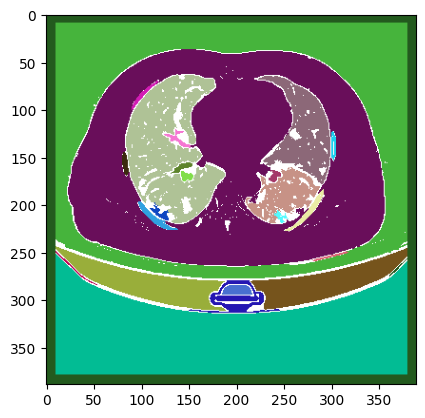

In [3]:
import cv2
import itertools
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
#class pour une pile
class Stack():
    def __init__(self):
        self.item = []
        self.obj=[]
    def push(self, value):
        self.item.append(value)

    def pop(self):
        return self.item.pop()

    def size(self):
        return len(self.item)

    def isEmpty(self):
        return self.size() == 0

    def clear(self):
        self.item = []

class regionGrow():
  
    def __init__(self,im_path,th):
        self.readImage(im_path)
        self.h, self.w,_ =  self.im.shape
        self.passedBy = np.zeros((self.h,self.w), np.double)
        self.currentRegion = 0
        self.iterations=0
        self.SEGS=np.zeros((self.h,self.w,3), dtype='uint8')
        self.stack = Stack()
        self.thresh=float(th)
    def readImage(self, img_path):
        self.im = cv2.imread(img_path,1).astype('int')
    

    def getNeighbour(self, x0, y0):
        return [
            (x, y)
            for i, j in itertools.product((-1, 0, 1), repeat=2)
            if (i, j) != (0, 0) and self.boundaries(x := x0 + i, y := y0 + j)
        ]
    

    def create_seeds(self):
        return [
            [self.h/2,self.w/2],
            [self.h/3,self.w/3],[2*self.h/3,self.w/3],[self.h/3-10,self.w/3],
            [self.h/3,2*self.w/3],[2*self.h/3,2*self.w/3],[self.h/3-10,2*self.w/3],
            [self.h/3,self.w-10],[2*self.h/3,self.w-10],[self.h/3-10,self.w-10]
                    ]
    def ApplyRegionGrow(self, cv_display = True):

        randomseeds = self.create_seeds()
        np.random.shuffle(randomseeds)

        for x0 in range (self.h):
            for y0 in range (self.w):

                if self.passedBy[x0,y0] == 0 : #and (np.all(self.im[x0,y0] > 0)) :  
                    self.currentRegion += 1
                    self.passedBy[x0,y0] = self.currentRegion
                    self.stack.push((x0,y0))
                    self.prev_region_count= 0

                    while not self.stack.isEmpty():
                        x,y = self.stack.pop()
                        self.BFS(x,y)
                        self.iterations+=1

                    if self.PassedAll():
                        break

                    if self.prev_region_count< 8*8 :     
                       x0, y0 = self.reset_region(x0, y0)
                       

        
        
        if self.iterations>200000:
            print("Max Iterations")
        print(f"Iterations : {str(self.iterations)}")

        if cv_display:
            [self.color_pixel(i,j) for i, j in itertools.product(range(self.h), range (self.w))]
            self.display()

    def reset_region(self, x0, y0):

        self.passedBy[self.passedBy==self.currentRegion] = 0
        x0=random.randint(x0-4,x0+4)
        y0=random.randint(y0-4,y0+4)
        x0 = np.clip(x0, 0, self.h - 1)
        y0 = np.clip(y0, 0, self.w - 1)
        self.currentRegion-=1
        return x0, y0

    def color_pixel(self, i, j):
        val = self.passedBy[i][j]
        self.SEGS[i][j] = (255, 255, 255) if (val==0) else (val*35, val*90, val*30)

    def display(self):
        plt.imshow(self.SEGS)
        plt.show()
    def BFS(self, x0,y0):

        regionNum = self.passedBy[x0,y0]
        
        elems = [np.mean(self.im[x0, y0])]

        var=self.thresh

        neighbours=self.getNeighbour(x0,y0)

        for x,y in neighbours:
            if self.passedBy[x,y] == 0 and self.distance(x,y,x0,y0) < var:

                if self.PassedAll():
                    break

                self.passedBy[x,y] = regionNum
                self.stack.push((x,y))
                elems.append(np.mean(self.im[x,y]))
                var=np.var(elems)
                self.prev_region_count+=1
            var=max(var,self.thresh)
                
    
    
    def PassedAll(self, max_iteration = 200000):
   
        return self.iterations > max_iteration or np.all(self.passedBy > 0)


    def boundaries(self, x,y):
        return  0<=x<self.h and 0<=y<self.w
    
    def distance(self,x,y,x0,y0):

        return np.linalg.norm(self.im[x0, y0] - self.im[x, y])





example = regionGrow("cttest.png",20)
example.ApplyRegionGrow()

Region Grow Supervised

In [4]:
import cv2
import numpy as np
import random
import sys
import itertools

#class pour une pile
class Stack():
    def __init__(self):
        self.item = []
        self.obj=[]
    def push(self, value):
        self.item.append(value)

    def pop(self):
        return self.item.pop()

    def size(self):
        return len(self.item)

    def isEmpty(self):
        return self.size() == 0

    def clear(self):
        self.item = []

class regionGrow():
  
    def __init__(self,im_path,th):
        self.readImage(im_path)
        self.h, self.w,_ =  self.im.shape
        self.passedBy = np.zeros((self.h,self.w), np.double)
        self.currentRegion = 0
        self.iterations=0
        self.SEGS=np.zeros((self.h,self.w,3), dtype='uint8')
        self.stack = Stack()
        self.thresh=float(th)
        
    def readImage(self, img_path):
        self.im = cv2.imread(img_path,1).astype('int')
    

    def getNeighbour(self, x0, y0):
        return [
            (x, y)
            for i, j in itertools.product((-1, 0, 1), repeat=2)
            if (i, j) != (0, 0) and self.boundaries(x := x0 + i, y := y0 + j)
        ]
    def ApplyRegionGrow(self,seeds, cv_display = True):
        temp=[]
        for i in seeds:
            temp.append(i)
            temp.extend(self.getNeighbour(*i))
        seeds=temp
        for i in (seeds):
            x0, y0 = *i,
         
            if self.passedBy[x0,y0] == 0 and np.all(self.im[x0,y0] > 0) :  
                self.currentRegion += 1
                self.passedBy[x0,y0] = self.currentRegion
                self.stack.push((x0,y0))
                
                while not self.stack.isEmpty():
                    x,y = self.stack.pop()
                    self.BFS(x,y)
                    self.iterations+=1
                if(self.PassedAll()):
                    break
                count = np.count_nonzero(self.passedBy == self.currentRegion)
                if(count <  8 * 8 ):   
                    x0 ,y0 = self.reset_region(x0, y0)  


        if cv_display:
            [self.color_pixel(i,j) for i, j in itertools.product(range(self.h), range (self.w))]
            self.display()

    def reset_region(self, x0, y0):
        self.passedBy[self.passedBy==self.currentRegion] = 0   
        self.currentRegion -= 1
        return x0 - 1, y0 - 1
    def BFS(self, x0,y0):
        regionNum = self.passedBy[x0,y0]
        elems = [
            np.mean(self.im[x0, y0])
        ]

        var=self.thresh
        neighbours=self.getNeighbour(x0,y0)

        for x,y in neighbours:
            if self.passedBy[x,y] == 0 and self.distance(x,y,x0,y0) < var:
                if(self.PassedAll()):
                    break
                self.passedBy[x,y] = regionNum
                self.stack.push((x,y))

                elems.append(np.mean(self.im[x, y]))
                var = np.var(elems)

            var = max(var,self.thresh)
                
    
    def color_pixel(self, i, j):
        val = self.passedBy[i][j]
        self.SEGS[i][j] = (255, 255, 255) if (val==0) else (val*35, val*90, val*30)

    def display(self):
        cv2.imshow("",self.SEGS)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def PassedAll(self, max_iteration = 200000):
   
        return self.iterations > max_iteration or np.all(self.passedBy > 0)


    def boundaries(self, x,y):
        return  0<=x<self.h and 0<=y<self.w
    
    def distance(self,x,y,x0,y0):

        return np.linalg.norm(self.im[x0, y0] - self.im[x, y])



def get_seeds(event,x,y,flags,param):
    global seeds
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.destroyAllWindows()
        
    if event == cv2.EVENT_LBUTTONDOWN:
        seeds.append([int(y),int(x)])

seeds=[]
example = regionGrow("cttest.png",20)
cv2.namedWindow('image')
cv2.setMouseCallback('image',get_seeds)
cv2.imshow('image',cv2.imread("cttest.png",1))
cv2.waitKey(0)


example.ApplyRegionGrow(seeds)

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


In [ ]:
import cv2
import numpy as np
import itertools
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------
# 1) RegionGrow class
# ----------------------------------------------------------------------------
class Stack:
    def __init__(self):
        self.item = []
    def push(self, value):
        self.item.append(value)
    def pop(self):
        return self.item.pop()
    def size(self):
        return len(self.item)
    def isEmpty(self):
        return self.size() == 0
    def clear(self):
        self.item = []

class regionGrow:
    def __init__(self, im_path, th):
        """Initialize with image path and threshold."""
        self.readImage(im_path)
        self.h, self.w, _ = self.im.shape
        self.passedBy = np.zeros((self.h, self.w), dtype=np.float32)
        self.currentRegion = 0
        self.iterations = 0
        self.SEGS = np.zeros((self.h, self.w, 3), dtype=np.uint8)
        self.stack = Stack()
        self.thresh = float(th)

    def readImage(self, img_path):
        """Load image with OpenCV (BGR) and convert to int for safe math."""
        self.im = cv2.imread(img_path, cv2.IMREAD_COLOR).astype('int')

    def getNeighbour(self, x0, y0):
        """Return valid 8-neighbors within boundaries."""
        neighbors = []
        for i, j in itertools.product((-1, 0, 1), repeat=2):
            if (i, j) != (0, 0):
                x, y = x0 + i, y0 + j
                if 0 <= x < self.h and 0 <= y < self.w:
                    neighbors.append((x, y))
        return neighbors

    def ApplyRegionGrow(self, seeds, display_result=True):
        """
        Main region-growing routine:
         - Expand from each seed
         - Color the final segmentation
         - Optionally display the result.
        """
        # Expand the seed list so we also consider neighbors of each seed
        temp = []
        for i in seeds:
            temp.append(i)
            temp.extend(self.getNeighbour(*i))
        seeds = temp

        for (x0, y0) in seeds:
            # If unvisited and not black, start a new region
            if self.passedBy[x0, y0] == 0 and np.all(self.im[x0, y0] > 0):
                self.currentRegion += 1
                self.passedBy[x0, y0] = self.currentRegion
                self.stack.push((x0, y0))
                
                # Grow until stack is empty
                while not self.stack.isEmpty():
                    x, y = self.stack.pop()
                    self.BFS(x, y)
                    self.iterations += 1

                # Stop if we've visited enough or everything is done
                if self.PassedAll():
                    break

                # If the region is too small, reset it
                count = np.count_nonzero(self.passedBy == self.currentRegion)
                if count < 64:
                    self.reset_region(x0, y0)

        # Display result if requested
        if display_result:
            self.color_segmentation()
            self.display_matplotlib()

    def BFS(self, x0, y0):
        """Grow the region from (x0, y0)."""
        regionNum = self.passedBy[x0, y0]
        # We'll track intensities to dynamically adjust threshold
        elems = [np.mean(self.im[x0, y0])]
        var = self.thresh

        # Check all neighbors
        for (nx, ny) in self.getNeighbour(x0, y0):
            if self.passedBy[nx, ny] == 0 and self.distance(nx, ny, x0, y0) < var:
                if self.PassedAll():
                    break
                self.passedBy[nx, ny] = regionNum
                self.stack.push((nx, ny))
                elems.append(np.mean(self.im[nx, ny]))
                var = np.var(elems)      # dynamic variance
            var = max(var, self.thresh)  # keep it above the base threshold

    def color_segmentation(self):
        """Color each region with a simple mapping from region number."""
        for i in range(self.h):
            for j in range(self.w):
                val = self.passedBy[i, j]
                if val == 0:
                    self.SEGS[i, j] = (255, 255, 255)  # white for unvisited
                else:
                    # Arbitrary color scheme
                    self.SEGS[i, j] = (
                        int((val * 35) % 255),
                        int((val * 90) % 255),
                        int((val * 30) % 255)
                    )

    def display_matplotlib(self):
        """Show the segmentation result via Matplotlib."""
        plt.figure(figsize=(6, 6))
        rgb_img = cv2.cvtColor(self.SEGS, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
        plt.title("Region Growing Result")
        plt.axis('off')
        plt.show()

    def PassedAll(self, max_iteration=200000):
        """Stop if too many expansions or if all pixels are visited."""
        return (self.iterations > max_iteration) or np.all(self.passedBy > 0)

    def reset_region(self, x0, y0):
        """If the region is too small, revert it and decrement region count."""
        self.passedBy[self.passedBy == self.currentRegion] = 0
        self.currentRegion -= 1
        return (x0 - 1, y0 - 1)

    def distance(self, x, y, x0, y0):
        """Euclidean distance in BGR space."""
        return np.linalg.norm(self.im[x0, y0] - self.im[x, y])

# ----------------------------------------------------------------------------
# 2) Manually define seeds and run the region-growing
# ----------------------------------------------------------------------------

if __name__ == "__main__":
    # Replace with the actual path to your image
    img_path = "cttest.png"

    # Manually define seeds as (row, col) pairs
    # Example seeds: one near row=100,col=150, another near row=200,col=300, etc.
    seeds = [
        (100, 150),
        (200, 300)
    ]

    # Instantiate the region grower
    rg = regionGrow(img_path, th=20)

    # Apply region growing and display result
    rg.ApplyRegionGrow(seeds, display_result=True)


In [15]:
!pip install ipympl

Button(button_style='info', description='Run Segmentation', style=ButtonStyle())

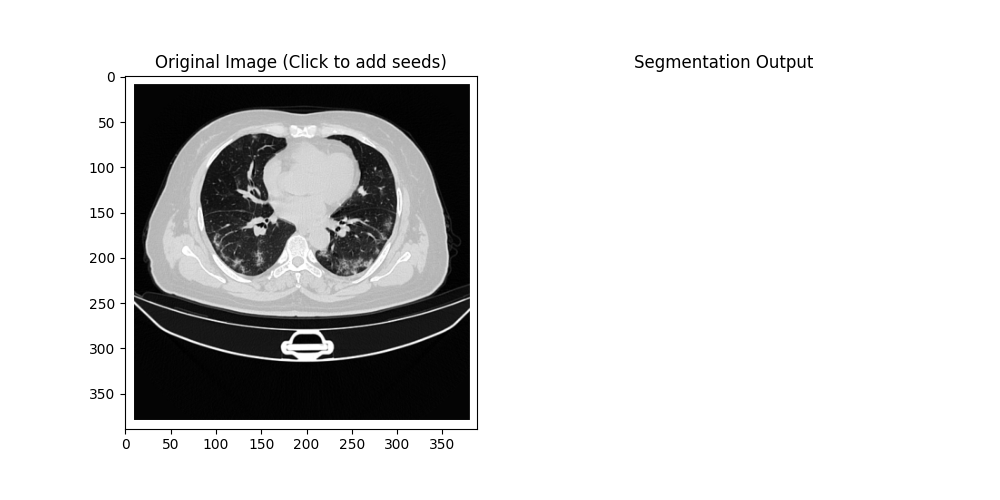

In [1]:
%matplotlib ipympl
import cv2
import numpy as np
import itertools
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ----------------------------------------------------------------------------
# 1) RegionGrow class
# ----------------------------------------------------------------------------
class Stack:
    def __init__(self):
        self.item = []
    def push(self, value):
        self.item.append(value)
    def pop(self):
        return self.item.pop()
    def size(self):
        return len(self.item)
    def isEmpty(self):
        return self.size() == 0
    def clear(self):
        self.item = []

class regionGrow:
    def __init__(self, im_path, th):
        self.readImage(im_path)
        self.h, self.w, _ = self.im.shape
        self.passedBy = np.zeros((self.h, self.w), dtype=np.float32)
        self.currentRegion = 0
        self.iterations = 0
        self.SEGS = np.zeros((self.h, self.w, 3), dtype=np.uint8)
        self.stack = Stack()
        self.thresh = float(th)

    def readImage(self, img_path):
        self.im = cv2.imread(img_path, cv2.IMREAD_COLOR).astype("int")

    def getNeighbour(self, x0, y0):
        neighbors = []
        for i, j in itertools.product((-1, 0, 1), repeat=2):
            if (i, j) != (0, 0):
                x, y = x0 + i, y0 + j
                if 0 <= x < self.h and 0 <= y < self.w:
                    neighbors.append((x, y))
        return neighbors

    def ApplyRegionGrow(self, seeds):
        """
        seeds: list of (row, col) integers
        """
        # Expand seeds list to handle immediate neighbors
        temp = []
        for (xr, yc) in seeds:
            temp.append((xr, yc))
            temp.extend(self.getNeighbour(xr, yc))
        seeds = temp

        for (x0, y0) in seeds:
            if self.passedBy[x0, y0] == 0 and np.all(self.im[x0, y0] > 0):
                self.currentRegion += 1
                self.passedBy[x0, y0] = self.currentRegion
                self.stack.push((x0, y0))

                while not self.stack.isEmpty():
                    x, y = self.stack.pop()
                    self.BFS(x, y)
                    self.iterations += 1

                if self.PassedAll():
                    break

                count = np.count_nonzero(self.passedBy == self.currentRegion)
                if count < 64:  # If region is too small, revert it
                    self.reset_region(x0, y0)

        # Color the final segmentation
        self.color_segmentation()

    def BFS(self, x0, y0):
        regionNum = self.passedBy[x0, y0]
        elems = [np.mean(self.im[x0, y0])]
        var = self.thresh

        for (nx, ny) in self.getNeighbour(x0, y0):
            if self.passedBy[nx, ny] == 0 and self.distance(nx, ny, x0, y0) < var:
                if self.PassedAll():
                    break
                self.passedBy[nx, ny] = regionNum
                self.stack.push((nx, ny))
                elems.append(np.mean(self.im[nx, ny]))
                var = np.var(elems)
            var = max(var, self.thresh)

    def color_segmentation(self):
        for i in range(self.h):
            for j in range(self.w):
                val = self.passedBy[i, j]
                if val == 0:
                    self.SEGS[i, j] = (255, 255, 255)
                else:
                    self.SEGS[i, j] = (
                        int((val * 35) % 255),
                        int((val * 90) % 255),
                        int((val * 30) % 255)
                    )

    def PassedAll(self, max_iteration=200000):
        return (self.iterations > max_iteration) or np.all(self.passedBy > 0)

    def reset_region(self, x0, y0):
        self.passedBy[self.passedBy == self.currentRegion] = 0
        self.currentRegion -= 1
        return (x0 - 1, y0 - 1)

    def distance(self, x, y, x0, y0):
        return np.linalg.norm(self.im[x0, y0] - self.im[x, y])


# ----------------------------------------------------------------------------
# 2) Setup: Load image, create figure, placeholders, etc.
# ----------------------------------------------------------------------------
img_path = "cttest.png"  # change to your path if needed
original_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
if original_img is None:
    raise FileNotFoundError(f"Could not load image {img_path}")

# RegionGrow instance (we'll run it after we pick seeds)
rg = regionGrow(img_path, th=20)

# We'll store seeds as (row, col)
seeds = []

# Create a single figure with 2 subplots: left=original, right=segmentation
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image (Click to add seeds)")
axes[1].set_title("Segmentation Output")
axes[1].axis('off')  # hide axis ticks until we show segmentation

# We'll also keep a reference to the second subplot's imshow
# Initialize it with a blank (white) image of the same shape
blank = np.full_like(original_img, 255, dtype=np.uint8)
seg_display = axes[1].imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))

# ----------------------------------------------------------------------------
# 3) Define the Mouse Callback for the LEFT subplot
# ----------------------------------------------------------------------------
def on_click(event):
    """If the click is in axes[0], record a seed, place a red dot."""
    # We only care about clicks in the left subplot
    if event.inaxes == axes[0]:
        if event.xdata is not None and event.ydata is not None:
            col = int(event.xdata)
            row = int(event.ydata)
            seeds.append((row, col))
            # Draw a red dot on the original image
            axes[0].plot(col, row, 'ro')
            fig.canvas.draw()

# Connect the callback to the figure
cid = fig.canvas.mpl_connect('button_press_event', on_click)


# ----------------------------------------------------------------------------
# 4) Define a Button to trigger segmentation
# ----------------------------------------------------------------------------
button = widgets.Button(description="Run Segmentation", button_style='info')
display(button)

def on_button_click(b):
    """
    When user clicks the button:
      1) Run region growing with the current seeds
      2) Update the right subplot with the segmentation
    """
    # Run region growing
    rg.ApplyRegionGrow(seeds)

    # Update axes[1] with the segmentation from rg.SEGS
    seg_bgr = rg.SEGS
    seg_rgb = cv2.cvtColor(seg_bgr, cv2.COLOR_BGR2RGB)
    seg_display.set_data(seg_rgb)  # update the image data
    axes[1].axis('off')            # hide axis ticks
    axes[1].set_title("Segmentation Output")
    fig.canvas.draw()

# Connect the button callback
button.on_click(on_button_click)


---
# Introduction to Active Contours (Snakes)

Active Contour Models, often referred to as “snakes,” are an influential approach to image segmentation that dynamically deforms a curve (or “contour”) to capture object boundaries. The fundamental idea is to initialize a curve near the region of interest and iteratively adjust its shape according to both **internal forces** (which smooth or regularize the contour) and **external forces** (derived from image features like edges or gradient magnitudes).

## Key Concepts

1. **Parametric Representation**  
   A snake is typically represented parametrically, \( \mathbf{v}(s) = [x(s), y(s)] \), where \( s \in [0,1] \). The shape and position of the snake are adjusted at each iteration to minimize an **energy function**.

2. **Energy Function**  
   The energy function comprises:  
   - **Internal Energy**: Enforces smoothness and continuity of the curve (e.g., penalizing large changes in curvature).  
   - **External Energy**: Drives the snake toward image features such as edges or salient boundaries. A common choice is the image gradient, encouraging the snake to align with strong edges.

3. **Initialization and Evolution**  
   - **Initialization**: The contour is placed roughly near the boundary of the object of interest.  
   - **Evolution**: By iteratively updating the snake based on the total energy gradient, the curve “snaps” to the most prominent edges in the image.



Active Contours provide a powerful framework for object boundary detection in images, highlighting the importance of combining image-derived forces with a regularizing contour model to achieve an accurate, smooth segmentation.


In [4]:
# -*- coding: utf-8 -*-

"""
====================
Morphological Snakes
====================

*Morphological Snakes* [1]_ are a family of methods for image segmentation.
Their behavior is similar to that of active contours (for example, *Geodesic
Active Contours* [2]_ or *Active Contours without Edges* [3]_). However,
*Morphological Snakes* use morphological operators (such as dilation or
erosion) over a binary array instead of solving PDEs over a floating point
array, which is the standard approach for active contours. This makes
*Morphological Snakes* faster and numerically more stable than their
traditional counterpart.

There are two *Morphological Snakes* methods available in this implementation:
*Morphological Geodesic Active Contours* (**MorphGAC**, implemented in the
function ``morphological_geodesic_active_contour``) and *Morphological Active
Contours without Edges* (**MorphACWE**, implemented in the function
``morphological_chan_vese``).

**MorphGAC** is suitable for images with visible contours, even when these
contours might be noisy, cluttered, or partially unclear. It requires, however,
that the image is preprocessed to highlight the contours. This can be done
using the function ``inverse_gaussian_gradient``, although the user might want
to define their own version. The quality of the **MorphGAC** segmentation
depends greatly on this preprocessing step.

On the contrary, **MorphACWE** works well when the pixel values of the inside
and the outside regions of the object to segment have different averages.
Unlike **MorphGAC**, **MorphACWE** does not require that the contours of the
object are well defined, and it works over the original image without any
preceding processing. This makes **MorphACWE** easier to use and tune than
**MorphGAC**.

References
----------

.. [1] A Morphological Approach to Curvature-based Evolution of Curves and
       Surfaces, Pablo Márquez-Neila, Luis Baumela and Luis Álvarez. In IEEE
       Transactions on Pattern Analysis and Machine Intelligence (PAMI),
       2014, DOI 10.1109/TPAMI.2013.106
.. [2] Geodesic Active Contours, Vicent Caselles, Ron Kimmel and Guillermo
       Sapiro. In International Journal of Computer Vision (IJCV), 1997,
       DOI:10.1023/A:1007979827043
.. [3] Active Contours without Edges, Tony Chan and Luminita Vese. In IEEE
       Transactions on Image Processing, 2001, DOI:10.1109/83.902291

"""
__author__ = "P. Márquez Neila <p.mneila@upm.es>"


from itertools import cycle

import numpy as np
from scipy import ndimage as ndi

__all__ = [
    'morphological_chan_vese',
    'morphological_geodesic_active_contour',
    'inverse_gaussian_gradient',
    'circle_level_set',
    'checkerboard_level_set'
]

__version__ = (2, 1, 1)
__version_str__ = ".".join(map(str, __version__))


class _fcycle(object):

    def __init__(self, iterable):
        """Call functions from the iterable each time it is called."""
        self.funcs = cycle(iterable)

    def __call__(self, *args, **kwargs):
        f = next(self.funcs)
        return f(*args, **kwargs)


# SI and IS operators for 2D and 3D.
_P2 = [np.eye(3),
       np.array([[0, 1, 0]] * 3),
       np.flipud(np.eye(3)),
       np.rot90([[0, 1, 0]] * 3)]
_P3 = [np.zeros((3, 3, 3)) for i in range(9)]

_P3[0][:, :, 1] = 1
_P3[1][:, 1, :] = 1
_P3[2][1, :, :] = 1
_P3[3][:, [0, 1, 2], [0, 1, 2]] = 1
_P3[4][:, [0, 1, 2], [2, 1, 0]] = 1
_P3[5][[0, 1, 2], :, [0, 1, 2]] = 1
_P3[6][[0, 1, 2], :, [2, 1, 0]] = 1
_P3[7][[0, 1, 2], [0, 1, 2], :] = 1
_P3[8][[0, 1, 2], [2, 1, 0], :] = 1


def sup_inf(u):
    """SI operator."""

    if np.ndim(u) == 2:
        P = _P2
    elif np.ndim(u) == 3:
        P = _P3
    else:
        raise ValueError("u has an invalid number of dimensions "
                         "(should be 2 or 3)")

    erosions = []
    for P_i in P:
        erosions.append(ndi.binary_erosion(u, P_i))

    return np.array(erosions, dtype=np.int8).max(0)


def inf_sup(u):
    """IS operator."""

    if np.ndim(u) == 2:
        P = _P2
    elif np.ndim(u) == 3:
        P = _P3
    else:
        raise ValueError("u has an invalid number of dimensions "
                         "(should be 2 or 3)")

    dilations = []
    for P_i in P:
        dilations.append(ndi.binary_dilation(u, P_i))

    return np.array(dilations, dtype=np.int8).min(0)


_curvop = _fcycle([lambda u: sup_inf(inf_sup(u)),   # SIoIS
                   lambda u: inf_sup(sup_inf(u))])  # ISoSI


def _check_input(image, init_level_set):
    """Check that shapes of `image` and `init_level_set` match."""
    if image.ndim not in [2, 3]:
        raise ValueError("`image` must be a 2 or 3-dimensional array.")

    if len(image.shape) != len(init_level_set.shape):
        raise ValueError("The dimensions of the initial level set do not "
                         "match the dimensions of the image.")


def _init_level_set(init_level_set, image_shape):
    """Auxiliary function for initializing level sets with a string.

    If `init_level_set` is not a string, it is returned as is.
    """
    if isinstance(init_level_set, str):
        if init_level_set == 'checkerboard':
            res = checkerboard_level_set(image_shape)
        elif init_level_set == 'circle':
            res = circle_level_set(image_shape)
        elif init_level_set == 'ellipsoid':
            res = ellipsoid_level_set(image_shape)
        else:
            raise ValueError("`init_level_set` not in "
                             "['checkerboard', 'circle', 'ellipsoid']")
    else:
        res = init_level_set
    return res


def circle_level_set(image_shape, center=None, radius=None):
    """Create a circle level set with binary values.

    Parameters
    ----------
    image_shape : tuple of positive integers
        Shape of the image
    center : tuple of positive integers, optional
        Coordinates of the center of the circle given in (row, column). If not
        given, it defaults to the center of the image.
    radius : float, optional
        Radius of the circle. If not given, it is set to the 75% of the
        smallest image dimension.

    Returns
    -------
    out : array with shape `image_shape`
        Binary level set of the circle with the given `radius` and `center`.

    See also
    --------
    ellipsoid_level_set
    checkerboard_level_set
    """

    if center is None:
        center = tuple(i // 2 for i in image_shape)

    if radius is None:
        radius = min(image_shape) * 3.0 / 8.0

    grid = np.mgrid[[slice(i) for i in image_shape]]
    grid = (grid.T - center).T
    phi = radius - np.sqrt(np.sum((grid)**2, 0))
    res = np.int8(phi > 0)
    return res


def ellipsoid_level_set(image_shape, center=None, semi_axis=None):
    """Create a ellipsoid level set with binary values.

    Parameters
    ----------
    image_shape : tuple of positive integers
        Shape of the image
    center : tuple of integers, optional
        Coordinates of the center of the ellipsoid.
        If not given, it defaults to the center of the image.
    semi_axis : tuple of floats, optional
        Lengths of the semi-axis of the ellispoid.
        If not given, it defaults to the half of the image dimensions.

    Returns
    -------
    out : array with shape `image_shape`
        Binary level set of the ellipsoid with the given `center`
        and `semi_axis`.

    See also
    --------
    circle_level_set
    """

    if center is None:
        center = tuple(i // 2 for i in image_shape)

    if semi_axis is None:
        semi_axis = tuple(i / 2 for i in image_shape)

    if len(center) != len(image_shape):
        raise ValueError("`center` and `image_shape` must have the same length.")

    if len(semi_axis) != len(image_shape):
        raise ValueError("`semi_axis` and `image_shape` must have the same length.")

    if len(image_shape) == 2:
        xc, yc = center
        rx, ry = semi_axis
        phi = 1 - np.fromfunction(
            lambda x, y: ((x - xc) / rx) ** 2 +
                         ((y - yc) / ry) ** 2,
            image_shape, dtype=float)
    elif len(image_shape) == 3:
        xc, yc, zc = center
        rx, ry, rz = semi_axis
        phi = 1 - np.fromfunction(
            lambda x, y, z: ((x - xc) / rx) ** 2 +
                            ((y - yc) / ry) ** 2 +
                            ((z - zc) / rz) ** 2,
            image_shape, dtype=float)
    else:
        raise ValueError("`image_shape` must be a 2- or 3-tuple.")

    res = np.int8(phi > 0)
    return res


def checkerboard_level_set(image_shape, square_size=5):
    """Create a checkerboard level set with binary values.

    Parameters
    ----------
    image_shape : tuple of positive integers
        Shape of the image.
    square_size : int, optional
        Size of the squares of the checkerboard. It defaults to 5.

    Returns
    -------
    out : array with shape `image_shape`
        Binary level set of the checkerboard.

    See also
    --------
    circle_level_set
    """

    grid = np.ogrid[[slice(i) for i in image_shape]]
    grid = [(grid_i // square_size) & 1 for grid_i in grid]

    checkerboard = np.bitwise_xor.reduce(grid, axis=0)
    res = np.int8(checkerboard)
    return res


def inverse_gaussian_gradient(image, alpha=100.0, sigma=5.0):
    """Inverse of gradient magnitude.

    Compute the magnitude of the gradients in the image and then inverts the
    result in the range [0, 1]. Flat areas are assigned values close to 1,
    while areas close to borders are assigned values close to 0.

    This function or a similar one defined by the user should be applied over
    the image as a preprocessing step before calling
    `morphological_geodesic_active_contour`.

    Parameters
    ----------
    image : (M, N) or (L, M, N) array
        Grayscale image or volume.
    alpha : float, optional
        Controls the steepness of the inversion. A larger value will make the
        transition between the flat areas and border areas steeper in the
        resulting array.
    sigma : float, optional
        Standard deviation of the Gaussian filter applied over the image.

    Returns
    -------
    gimage : (M, N) or (L, M, N) array
        Preprocessed image (or volume) suitable for
        `morphological_geodesic_active_contour`.
    """
    gradnorm = ndi.gaussian_gradient_magnitude(image, sigma, mode='nearest')
    return 1.0 / np.sqrt(1.0 + alpha * gradnorm)


def morphological_chan_vese(image, iterations, init_level_set='checkerboard',
                            smoothing=1, lambda1=1, lambda2=1,
                            iter_callback=lambda x: None):
    """Morphological Active Contours without Edges (MorphACWE)

    Active contours without edges implemented with morphological operators. It
    can be used to segment objects in images and volumes without well defined
    borders. It is required that the inside of the object looks different on
    average than the outside (i.e., the inner area of the object should be
    darker or lighter than the outer area on average).

    Parameters
    ----------
    image : (M, N) or (L, M, N) array
        Grayscale image or volume to be segmented.
    iterations : uint
        Number of iterations to run
    init_level_set : str, (M, N) array, or (L, M, N) array
        Initial level set. If an array is given, it will be binarized and used
        as the initial level set. If a string is given, it defines the method
        to generate a reasonable initial level set with the shape of the
        `image`. Accepted values are 'checkerboard' and 'circle'. See the
        documentation of `checkerboard_level_set` and `circle_level_set`
        respectively for details about how these level sets are created.
    smoothing : uint, optional
        Number of times the smoothing operator is applied per iteration.
        Reasonable values are around 1-4. Larger values lead to smoother
        segmentations.
    lambda1 : float, optional
        Weight parameter for the outer region. If `lambda1` is larger than
        `lambda2`, the outer region will contain a larger range of values than
        the inner region.
    lambda2 : float, optional
        Weight parameter for the inner region. If `lambda2` is larger than
        `lambda1`, the inner region will contain a larger range of values than
        the outer region.
    iter_callback : function, optional
        If given, this function is called once per iteration with the current
        level set as the only argument. This is useful for debugging or for
        plotting intermediate results during the evolution.

    Returns
    -------
    out : (M, N) or (L, M, N) array
        Final segmentation (i.e., the final level set)

    See also
    --------
    circle_level_set, checkerboard_level_set

    Notes
    -----

    This is a version of the Chan-Vese algorithm that uses morphological
    operators instead of solving a partial differential equation (PDE) for the
    evolution of the contour. The set of morphological operators used in this
    algorithm are proved to be infinitesimally equivalent to the Chan-Vese PDE
    (see [1]_). However, morphological operators are do not suffer from the
    numerical stability issues typically found in PDEs (it is not necessary to
    find the right time step for the evolution), and are computationally
    faster.

    The algorithm and its theoretical derivation are described in [1]_.

    References
    ----------
    .. [1] A Morphological Approach to Curvature-based Evolution of Curves and
           Surfaces, Pablo Márquez-Neila, Luis Baumela, Luis Álvarez. In IEEE
           Transactions on Pattern Analysis and Machine Intelligence (PAMI),
           2014, DOI 10.1109/TPAMI.2013.106
    """

    init_level_set = _init_level_set(init_level_set, image.shape)

    _check_input(image, init_level_set)

    u = np.int8(init_level_set > 0)

    iter_callback(u)

    for _ in range(iterations):

        # inside = u > 0
        # outside = u <= 0
        c0 = (image * (1 - u)).sum() / float((1 - u).sum() + 1e-8)
        c1 = (image * u).sum() / float(u.sum() + 1e-8)

        # Image attachment
        du = np.gradient(u)
        abs_du = np.abs(du).sum(0)
        aux = abs_du * (lambda1 * (image - c1)**2 - lambda2 * (image - c0)**2)

        u[aux < 0] = 1
        u[aux > 0] = 0

        # Smoothing
        for _ in range(smoothing):
            u = _curvop(u)

        iter_callback(u)

    return u


def morphological_geodesic_active_contour(gimage, iterations,
                                          init_level_set='circle', smoothing=1,
                                          threshold='auto', balloon=0,
                                          iter_callback=lambda x: None):
    """Morphological Geodesic Active Contours (MorphGAC).

    Geodesic active contours implemented with morphological operators. It can
    be used to segment objects with visible but noisy, cluttered, broken
    borders.

    Parameters
    ----------
    gimage : (M, N) or (L, M, N) array
        Preprocessed image or volume to be segmented. This is very rarely the
        original image. Instead, this is usually a preprocessed version of the
        original image that enhances and highlights the borders (or other
        structures) of the object to segment.
        `morphological_geodesic_active_contour` will try to stop the contour
        evolution in areas where `gimage` is small. See
        `morphsnakes.inverse_gaussian_gradient` as an example function to
        perform this preprocessing. Note that the quality of
        `morphological_geodesic_active_contour` might greatly depend on this
        preprocessing.
    iterations : uint
        Number of iterations to run.
    init_level_set : str, (M, N) array, or (L, M, N) array
        Initial level set. If an array is given, it will be binarized and used
        as the initial level set. If a string is given, it defines the method
        to generate a reasonable initial level set with the shape of the
        `image`. Accepted values are 'checkerboard' and 'circle'. See the
        documentation of `checkerboard_level_set` and `circle_level_set`
        respectively for details about how these level sets are created.
    smoothing : uint, optional
        Number of times the smoothing operator is applied per iteration.
        Reasonable values are around 1-4. Larger values lead to smoother
        segmentations.
    threshold : float, optional
        Areas of the image with a value smaller than this threshold will be
        considered borders. The evolution of the contour will stop in this
        areas.
    balloon : float, optional
        Balloon force to guide the contour in non-informative areas of the
        image, i.e., areas where the gradient of the image is too small to push
        the contour towards a border. A negative value will shrink the contour,
        while a positive value will expand the contour in these areas. Setting
        this to zero will disable the balloon force.
    iter_callback : function, optional
        If given, this function is called once per iteration with the current
        level set as the only argument. This is useful for debugging or for
        plotting intermediate results during the evolution.

    Returns
    -------
    out : (M, N) or (L, M, N) array
        Final segmentation (i.e., the final level set)

    See also
    --------
    inverse_gaussian_gradient, circle_level_set, checkerboard_level_set

    Notes
    -----

    This is a version of the Geodesic Active Contours (GAC) algorithm that uses
    morphological operators instead of solving partial differential equations
    (PDEs) for the evolution of the contour. The set of morphological operators
    used in this algorithm are proved to be infinitesimally equivalent to the
    GAC PDEs (see [1]_). However, morphological operators are do not suffer
    from the numerical stability issues typically found in PDEs (e.g., it is
    not necessary to find the right time step for the evolution), and are
    computationally faster.

    The algorithm and its theoretical derivation are described in [1]_.

    References
    ----------
    .. [1] A Morphological Approach to Curvature-based Evolution of Curves and
           Surfaces, Pablo Márquez-Neila, Luis Baumela, Luis Álvarez. In IEEE
           Transactions on Pattern Analysis and Machine Intelligence (PAMI),
           2014, DOI 10.1109/TPAMI.2013.106
    """

    image = gimage
    init_level_set = _init_level_set(init_level_set, image.shape)

    _check_input(image, init_level_set)

    if threshold == 'auto':
        threshold = np.percentile(image, 40)

    structure = np.ones((3,) * len(image.shape), dtype=np.int8)
    dimage = np.gradient(image)
    # threshold_mask = image > threshold
    if balloon != 0:
        threshold_mask_balloon = image > threshold / np.abs(balloon)

    u = np.int8(init_level_set > 0)

    iter_callback(u)

    for _ in range(iterations):

        # Balloon
        if balloon > 0:
            aux = ndi.binary_dilation(u, structure)
        elif balloon < 0:
            aux = ndi.binary_erosion(u, structure)
        if balloon != 0:
            u[threshold_mask_balloon] = aux[threshold_mask_balloon]

        # Image attachment
        aux = np.zeros_like(image)
        du = np.gradient(u)
        for el1, el2 in zip(dimage, du):
            aux += el1 * el2
        u[aux > 0] = 1
        u[aux < 0] = 0

        # Smoothing
        for _ in range(smoothing):
            u = _curvop(u)

        
        iter_callback(u)

    return u


In [3]:
!pip install scipy imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 11.8 MB/s eta 0:00:00a 0:00:01


/tmp/ipykernel_289/2030426460.py:98: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(PATH_IMG_NODULE)[..., 0] / 255.0


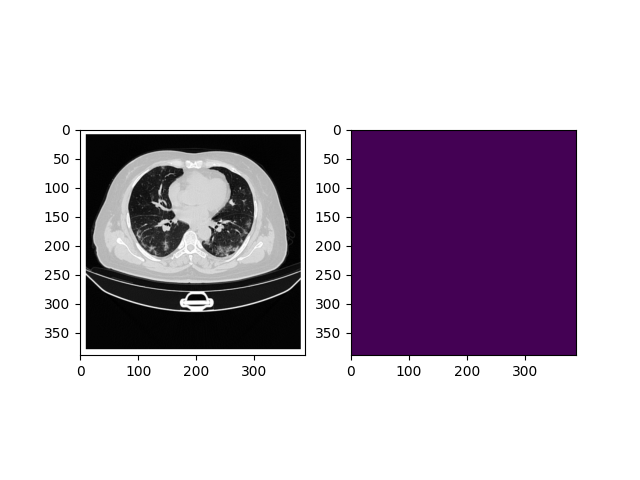

In [ ]:
import os
import logging
import io
logging.getLogger("PIL.PngImagePlugin").setLevel(logging.WARNING)

import numpy as np
from imageio import imread
# import tkinter  # <-- comment out if you're in a headless or notebook environment

# ----------------------------------------------------------------------------
# If needed, comment out forced backends:
# import matplotlib
# matplotlib.use('tkagg')
# matplotlib.use('TKAgg')
# ----------------------------------------------------------------------------

import matplotlib.pyplot as plt
# %matplotlib inline

# For creating and saving the GIF
from PIL import Image
from IPython.display import HTML, display

# Import the morphological snakes functions from wherever they are defined
# (Assuming they've been pasted in the same file or are available in scope)
# from morphsnakes import (morphological_geodesic_active_contour,
#                          circle_level_set, inverse_gaussian_gradient)

# -- If these are in the same file, the lines below need to be present:
# from morphsnakes import (
#     morphological_geodesic_active_contour,
#     morphological_chan_vese,
#     inverse_gaussian_gradient,
#     circle_level_set
# )


PATH_IMG_NODULE = 'cttest.png'


def visual_callback_2d(background, fig=None):
    """
    Returns a tuple: (callback_function, frames_list)

    callback_function(levelset):
        - Called each iteration to visualize and store the frame.
    frames_list:
        - A list that will contain PIL.Images (one per iteration).
    """

    # Prepare the visual environment.
    # We'll store frames in a list so we can make a GIF later.
    frames = []

    if fig is None:
        fig = plt.figure()
    fig.clf()

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(background, cmap=plt.cm.gray)

    ax2 = fig.add_subplot(1, 2, 2)
    ax_u = ax2.imshow(np.zeros_like(background), vmin=0, vmax=1)

    plt.pause(0.001)

    def callback(levelset):
        # Remove old contour
        if ax1.collections:
            ax1.collections[0].remove()
        # Draw contour at level=0.5
        ax1.contour(levelset, [0.5], colors='r')
        # Update the right subplot
        ax_u.set_data(levelset)

        # Force a draw so we can capture the frame
        fig.canvas.draw()
        plt.pause(0.001)

        # Convert current figure to a PIL image in memory
        buf = io.BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        frames.append(Image.open(buf))

    return callback, frames


def rgb2gray(img):
    """Convert a RGB image to gray scale."""
    return 0.2989 * img[..., 0] + 0.587 * img[..., 1] + 0.114 * img[..., 2]


def example_nodule():
    logging.info('Running: example_nodule (MorphGAC)...')

    # Load the image.
    img = imread(PATH_IMG_NODULE)[..., 0] / 255.0

    # g(I)
    gimg = inverse_gaussian_gradient(img, alpha=1000, sigma=5.48)

    # Initialization of the level-set.
    init_ls = circle_level_set(img.shape, (100, 126), 20)

    # Create our callback + frames list
    callback, frames = visual_callback_2d(img)

    # MorphGAC
    morphological_geodesic_active_contour(
        gimg,
        iterations=10,
        init_level_set=init_ls,
        smoothing=1,
        threshold=0.31,
        balloon=1,
        iter_callback=callback
    )

    # --------------------------------
    # After the loop, save frames to GIF
    # --------------------------------
    if frames:
        gif_path = "segmentation_evolution.gif"
        # Save the frames as an animated GIF
        frames[0].save(
            gif_path,
            save_all=True,
            append_images=frames[1:],
            loop=0,
            duration=200  # ms per frame
        )
        logging.info(f"GIF saved to: {gif_path}")

        # Display the GIF inline (if in a Jupyter notebook)
        display(HTML(f"<img src='{gif_path}' />"))


if __name__ == '__main__':
    example_nodule()
    logging.info("Done.")
    plt.show()


In [11]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.7 MB/s eta 0:00:00


# Introduction to Graph Cut Segmentation

Graph Cut is a powerful, globally oriented method for image segmentation. The core idea is to model the image as a graph where each pixel (or group of pixels known as “superpixels”) is represented by a node. Edges between nodes encode the cost or penalty of assigning those nodes to different segments, often based on pixel intensity differences or other similarity measures.  

## Key Concepts

1. **Graph Representation**  
   - **Nodes**: Each node represents a pixel (or superpixel).  
   - **Edges**: Connecting edges define a cost of separating those nodes into different segments (e.g., high if pixels are very similar, low if pixels differ significantly).

2. **Energy Minimization**  
   We define an energy function over possible segmentations, which incorporates:  
   - **Data Fidelity (Unary Terms)**: How well each pixel fits the label (foreground or background).  
   - **Smoothness (Pairwise Terms)**: Encourages pixels with similar appearance to share the same label.  
   The optimal segmentation is found by minimizing this energy using algorithms like the **minimum cut** or **max-flow**.

3. **Interactive and Fully Automated Modes**  
   - **Interactive (e.g., GrabCut)**: Users provide partial labeling (e.g., rough foreground/background annotations), and Graph Cut refines those to obtain a precise segmentation.  
   - **Fully Automated**: Some variations attempt to estimate parameters without user input, though they may require careful initialization or parameter tuning.



Graph Cut methods offer a strong balance between local detail capture and global consistency, making them a popular choice for both research and practical applications in computer vision and medical imaging.


In [ ]:

## Import necessary libraries here (You can add libraries you want to use here)
from skimage.util import img_as_float
from skimage import io, color
from skimage import draw
import matplotlib.pyplot as plt
import argparse, time
import math, copy
import numpy as np
import scipy.io
import cv2
from sklearn import mixture
from PIL import Image, ImageDraw
import os
import timeit


In [ ]:
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

# Get a normalized version of the given histograms (divide by sum)
def normalize_histograms(histograms):
  return np.float32([h / h.sum() for h in histograms])


In [ ]:
def mask_for_fg(img, img_mask):
  fg_image = np.zeros_like(img)
  fg_image[img_mask] = img[img_mask]
  return fg_image

def mask_for_bg(img, img_mask):
  bg_image = np.zeros_like(img)
  bg_image[~img_mask] = img[~img_mask]
  return bg_image


def visualize_likelihood_map(gmm_bg, gmm_fg, img):
  original_image = copy.deepcopy(img)
  print( " Orginal Image Shape : ",img.shape)
  original_image = original_image.reshape((-1,3))
  print( " Orginal Image Shape after reshapping : ",original_image.shape)
  log_likelihood_fg = gmm_fg.score_samples(original_image)
  log_likelihood_bg = gmm_bg.score_samples(original_image)

  log_likelihood_fg = log_likelihood_fg.reshape(img.shape[0],img.shape[1]) 
  log_likelihood_bg = log_likelihood_bg.reshape(img.shape[0],img.shape[1]) 
  print("log_likelihood_bg SHAPE :  ", log_likelihood_bg.shape)

  return log_likelihood_fg, log_likelihood_bg

In [ ]:
def gaussian_model(img):
  print("Original Image Shape : ", img.shape)
  new_img = img.reshape((-1,3))
  print("New Image Shape : ", new_img.shape)
  gmm_model = mixture.GaussianMixture(n_components= 2,covariance_type="tied").fit(new_img)
  gmm_labels = gmm_model.predict(new_img)

  segmented_image = gmm_labels.reshape(img.shape[0],img.shape[1])
  segmented_image = segmented_image * 255
  print("New Image Shape : ", segmented_image.shape)
  plt.imshow(segmented_image)
  return gmm_model, gmm_labels

def run_grabcut(img, bbox, itercount):
  bgdModel = np.zeros((1,65),np.float64)
  fgdModel = np.zeros((1,65),np.float64)

  grabcut_mask = np.zeros(img.shape[:2],np.uint8)
  cv2.grabCut(img,grabcut_mask,bbox,bgdModel,fgdModel,itercount,cv2.GC_INIT_WITH_RECT)
  mask2 = np.where((grabcut_mask==2)|(grabcut_mask==0),0,1).astype('uint8')
  img = img*mask2[:,:,np.newaxis]
  plt.imshow(img)
  return None

In [ ]:
## Import necessary libraries
from skimage.util import img_as_float
from skimage import io, color
from skimage import draw
import matplotlib.pyplot as plt
import argparse, time
import math, copy
import numpy as np
import cv2
from sklearn import mixture
from PIL import Image, ImageDraw
import os
import timeit

def show_image(img, title="Image"):
    # Convert BGR to RGB for displaying using matplotlib
    if len(img.shape) == 3 and img.shape[2] == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_rgb = img
    plt.figure()
    plt.title(title)
    plt.imshow(img_rgb, cmap='gray')
    plt.axis('off')
    plt.show()

def run_grabcut(img, bbox, itercount):
    """
    Runs the GrabCut algorithm using the provided bounding box.
    Parameters:
        img: Input BGR image (numpy array)
        bbox: Tuple (x, y, width, height)
        itercount: Number of iterations the GrabCut algorithm will run
    """
    # Initialize the mask
    grabcut_mask = np.zeros(img.shape[:2], np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    # Run GrabCut
    cv2.grabCut(img, grabcut_mask, bbox, bgdModel, fgdModel, itercount, cv2.GC_INIT_WITH_RECT)

    # Create a binary mask where pixels are either sure foreground or probable foreground
    mask2 = np.where((grabcut_mask==2)|(grabcut_mask==0), 0, 1).astype('uint8')
    segmented_img = img * mask2[:,:,np.newaxis]

    # Display the segmented image
    show_image(segmented_img, title="Segmented Image ({} iterations)".format(itercount))
    return segmented_img

### Main Block: ###

# Replace 'img_path' and 'bbox' with your image file path and desired bounding box.
# Example bounding box: (x, y, width, height)
img_path = 'cttest.png'  # Update this path
img = cv2.imread(img_path)
if img is None:
    raise ValueError("Could not read the image. Please check the path.")

bbox = (80, 50, 110, 170)  # Adjust these values for your image

# Draw the bounding box on the original image
img_with_box = img.copy()
cv2.rectangle(img_with_box, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (0,255,0), 2)
show_image(img_with_box, "Original Image with Bounding Box")

# Run GrabCut with the specified bounding box and iteration count
for i in [5, 10, 15]:
    print("Running GrabCut with {} iterations...".format(i))
    result = run_grabcut(img.copy(), bbox, i)


### Assessment Questions
=========================

<br><br>1. What kind of images or scenarios are best suited for Region Growing?
<br>
<font color="#008000">Answer :</font>  
Region Growing is especially useful when the target object or region has relatively uniform intensity (or color) and when you can readily define good seed points. In simpler images with clear boundaries and minimal intensity variation within objects, Region Growing can quickly produce accurate segmentations. If the intensity varies greatly within the same object (e.g., complex textures or uneven illumination), Region Growing might require more sophisticated similarity criteria or risk over-segmentation.

<br><br>2. Why do Active Contours (Snakes) require an initial contour, and how important is it?
<br>
<font color="#008000">Answer :</font>  
Snakes use an iterative optimization process that moves an initial curve toward object boundaries. The initial contour is critical because it determines if the snake can correctly converge to the true boundary. If placed too far, the snake might latch onto incorrect edges or fail to converge. A close initial contour typically yields more accurate and faster results.

<br><br>3. What advantages does a Graph Cut approach offer compared to purely local methods like Region Growing?
<br>
<font color="#008000">Answer :</font>  
Graph Cut methods consider a global perspective of the entire image, often producing a globally optimal partition under a well-defined energy function. They are robust in handling noisy or complex images by balancing local similarity (via edge weights) with global constraints (through user inputs or priors). This global optimization helps avoid local minima that can trap Region Growing.

<br><br>4. In what situations might Region Growing be preferred over Active Contours or Graph Cut?
<br>
<font color="#008000">Answer :</font>  
Region Growing might be preferable when you need a quick, straightforward method in a relatively simple image domain—especially if the objects have homogenous intensity regions. It is also a good option if you want an interactive approach where a user can place seed points and instantly see segmentation results without heavy computational requirements.

<br><br>5. How do Active Contours handle noise or weak edges?
<br>
<font color="#008000">Answer :</font>  
Active Contours balance internal (smoothness) and external (image-derived) energies. The internal energy discourages large deformations, which helps mitigate noise and spurious edges. The external energy component, usually derived from image gradients, drives the snake toward stronger edges. In cases of weak edges or high noise, additional constraints (like balloon forces or shape priors) can aid convergence.

<br><br>6. What are the computational considerations for using Graph Cut?
<br>
<font color="#008000">Answer :</font>  
Each pixel (or superpixel) corresponds to a node in a potentially large graph, making memory and computational demands significant for high-resolution images. Although efficient algorithms (e.g., Boykov-Kolmogorov, Dinic’s) can handle practical image sizes, very large datasets or real-time applications may pose performance challenges. Parameter choices for edge weights and priors also affect both segmentation quality and computational cost.

<br><br>7. How does user interaction differ among the three methods?
<br>
<font color="#008000">Answer :</font>  
- **Region Growing**: Users can place seed points to guide segmentation.  
- **Active Contours (Snakes)**: Users initialize a contour near the region of interest, which is then refined by the algorithm.  
- **Graph Cut**: Methods like GrabCut let users provide rough foreground/background annotations (scribbles) and rely on the algorithm to compute a global segmentation.  

Each approach offers different levels of control and ease of refinement based on user inputs.

<br><br>8. If I have limited image processing experience, which method should I start with?
<br>
<font color="#008000">Answer :</font>  
Region Growing is often the easiest to implement and understand since it uses a straightforward “grow from seed” concept. It requires fewer parameters and less mathematical background than Active Contours (which involve energy minimization) or Graph Cut (which involves graph-based optimization). After gaining familiarity with basic segmentation principles, one can progress to more advanced methods like Snakes or Graph Cut.


Registeration